<div class="alert alert-block alert-info">
<center>ESTATÍSTICA APLICADA A COMPUTAÇÃO</center>
<br><center>PROJETO 01</center><br>
<center>ALUNO: WESLEY WILSON ALMEIDA ARAÚJO</center>
</div>

<center><b>Acidentes de Trânsito em Rodovias Federais

<b>Dados</b><br>
<a href="https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos">Portal de dados abertos</a><br>
<a href="https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-acidentes">Acidentes</a>


<div class="alert alert-block alert-info">
<b>1ª Tarefa</b>
 
Carregue em dataframes os conjuntos de dados referentes ao ano de 2018, 2019 e 2020. Corrija quaisquer erros que apareçam no carregamento dos arquivos. É possível acessar os arquivos
compactados diretamente do site, sem precisar baixá-los?
</div>

In [1]:
import pandas as pd
df2018 = pd.read_csv('https://arquivos.prf.gov.br/arquivos/index.php/s/MaC6cieXSFACNWT/download', compression='zip', encoding='latin1', sep=';')
df2019 = pd.read_csv('https://arquivos.prf.gov.br/arquivos/index.php/s/kRBUylqz6DyQznN/download', compression='zip', encoding='latin1', sep=';')
df2020 = pd.read_csv('https://arquivos.prf.gov.br/arquivos/index.php/s/jdDLrQIf33xXSCe/download', compression='zip', encoding='latin1', sep=';')

Para a escolha do arquivo, eu achei melhor a organização dos acidentes agrupados por ocorrência, pois dá pra ter uma dimensão melhor de quantos casos aconteceram, no arquivo agrupado por pessoa, fica mais difícil pois tem várias linhas para 1 só ocorrência dependendo de quantas pessoas foram atingidas.

Após várias tentativas e erros, é possível sim carregar os dataframes diretamente do site sem precisar baixá-los, para isso, eu usei a função (read_csv) da biblioteca pandas, porém, ao tentar abrir o dataframe apareceu o seguinte erro:                  
• <i><font color="#ff0000">UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 10: invalid continuation byte.</font></i>                     
Para resolver esse erro, bastou usar o (encoding='latin1') para alterar o método de decodificação do arquivo, só que em seguida apareceu outro erro:                                                                                                          
• <i><font color="#ff0000">Error tokenizing data. C error: Expected 3 fields in line 19, saw 5.</font></i>                              
Esse erro indica que está com problema na separação das colunas, para isso eu utilizei (sep='<b>;</b>)', porém, apesar de corrigir esse erro específico, foram surgindo novos erros, até que eu encontrei nesse <a href="https://qastack.com.br/programming/18885175/read-a-zipped-file-as-a-pandas-dataframe">link</a> que faltava descompactar o arquivo, pois estava lendo da mesma forma que baixou, e após ter colocado (compression='zip') o dataframe foi carregado sem demais erros. Então é possível sim, ler os arquivos diretamente do site sem precisar baixá-los.

<div class="alert alert-block alert-info">
<b>2ª Tarefa</b>
 
Explore os conjuntos de dados, respondendo as questões.
</div>

<u>(a) quantos acidentes ocorreram em cada ano?</u>

In [2]:
Acidentes2018 = len(df2018)
print("Aconteceram", Acidentes2018, "acidentes no ano de 2018.")

Aconteceram 69295 acidentes no ano de 2018.


In [3]:
Acidentes2019 = len(df2019)
print("Aconteceram", Acidentes2019, "acidentes no ano de 2019.")

Aconteceram 67446 acidentes no ano de 2019.


In [4]:
Acidentes2020 = len(df2020)
print("Aconteceram", Acidentes2020, "acidentes no ano de 2020.")

Aconteceram 63548 acidentes no ano de 2020.


Como os arquivos contém a descrição de 1 acidente em cada linha, basta contar a quantidade de linhas para saber o número de acidentes que aconteceram em cada ano.

<u>(b) quantas variáveis cada conjunto de dados registra?</u>

In [5]:
Variaveis2018 = len(df2018.columns)
print("O conjunto de dados de 2018 registra", Variaveis2018, "variáveis.")

O conjunto de dados de 2018 registra 30 variáveis.


In [6]:
Variaveis2019 = len(df2019.columns)
print("O conjunto de dados de 2019 registra", Variaveis2019, "variáveis.")

O conjunto de dados de 2019 registra 30 variáveis.


In [7]:
Variaveis2020 = len(df2020.columns)
print("O conjunto de dados de 2020 registra", Variaveis2020, "variáveis.")

O conjunto de dados de 2020 registra 30 variáveis.


Para saber a quantidade de variáveis de cada conjunto, é preciso saber a quantidade de colunas que o arquivo tem, pois cada coluna possui uma variável diferente. Foi esperado que os 3 conjuntos tivessem a mesma quantidade de variáveis para que mantivesse um padrão em comparação com as dos anos anteriores.

<u>(c) quais as cinco cidades brasileiras onde mais ocorreram acidentes em rodovias federais?</u>

In [8]:
df = df2018.append([df2019, df2020])
df['municipio'].value_counts()

CURITIBA                   3063
BRASILIA                   2997
SAO JOSE                   2322
GUARULHOS                  2111
PALHOCA                    1887
                           ... 
IBARETAMA                     1
SANTO AMARO DO MARANHAO       1
JUINA                         1
PARICONHA                     1
ANAJAS                        1
Name: municipio, Length: 1926, dtype: int64

As cidades que mais ocorreram acidentes do período de 2018 a 2020 (por ordem) são: Curitiba(PR), Brasília(DF), São José dos Pinhais(PR), Guarulhos(SP) e Palhoça(SC).

Na realização dessa questão eu usei o append por já estar mais acostumado com esse método, além de encontrar no próprio <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#concatenating-using-append">guia do pandas</a> essa forma que me atendia bem. Em seguida só precisaria rankear, e o (value_counts) faz isso muito bem.

<u>(d) quantos acidentes com feridos graves aconteceram na Paraíba em 2019?</u>

In [9]:
feridos = df2019.loc[df2019['feridos_graves'] >= 1]
feridos['uf'].value_counts()

MG    1956
PR    1754
SC    1715
RS     888
ES     879
BA     847
RJ     794
GO     727
PE     634
SP     585
CE     457
PB     414
PI     403
RO     360
RN     356
MT     355
MA     349
MS     346
AL     197
PA     175
DF     162
SE     148
TO     117
AC      62
RR      50
AP      26
AM      21
Name: uf, dtype: int64

Na Paraíba tiveram 414 acidentes com feridos graves no ano de 2019.

Essa questão eu tive que utilizar uma condicional para conseguir extrair apenas os acidentes que tiveram feridos graves, por isso eu utilizei o (.loc), em seguida só contei os valores que tinha em cada estado pela mesma função do quesito anterior.

<div class="alert alert-block alert-info">
<b>3ª Tarefa</b>
 
Para cada indicação abaixo, construa um novo dataframe, salvando-o com a terminação .csv.
</div>

<u>(a) ranking de acidentes por estado para todos os anos (um só arquivo combinando a
informação dos três anos);</u>

In [10]:
RankingDF = pd.DataFrame(df['uf'].value_counts())
RankingDF = RankingDF.reset_index()
RankingDF = RankingDF.rename(columns={"index":"Estados","uf":"Acidentes"})
RankingDF.to_csv('AcidentesPorEstado.csv', sep=',', header=True, index = None)
pd.read_csv('AcidentesPorEstado.csv')

,Estados,Acidentes
0,MG,26160
1,SC,24145
2,PR,22850
3,RJ,13417
4,RS,13216
5,SP,12936
6,BA,10482
7,GO,10046
8,ES,8018
9,PE,8011


Eu aproveitei a estrutura que tinha feito na última questão e aproveitei e só transformei aquilo em um dataframe, e depois eu só reorganizei o dataframe para deixar mais bonito visualmente alterando o nome das colunas, depois só salvei como csv conforme pedido na questão.

<u>(b) acidentes por dia da semana para todos os anos (um só arquivo combinando a informação dos três anos)</u>

In [11]:
RankDias = pd.DataFrame(df['dia_semana'].value_counts())
RankDias = RankDias.reset_index()
RankDias = RankDias.rename(columns={"index":"Dia_da_semana","dia_semana":"Acidentes"})
RankDias.to_csv('AcidentesPorDia.csv', sep=',', header=True, index = None)
pd.read_csv('AcidentesPorDia.csv')

,Dia_da_semana,Acidentes
0,sábado,33005
1,domingo,33001
2,sexta-feira,30777
3,segunda-feira,27075
4,quinta-feira,26229
5,quarta-feira,25353
6,terça-feira,24849


Nessa questão eu peguei a estrutura que eu usei na A dessa questão e troquei os valores, chegando a conclusão de que o dia que mais ocorre acidentes é no sábado, com 33005 acidentes entre o período de 2018 a 2020.

<div class="alert alert-block alert-info">
<b>4ª Tarefa</b>
 
Com relação a ocorrência dos acidentes, responda:
</div>

<u>(a) qual a causa mais frequente e a mais rara de acidentes registrados nos três anos?</u>

In [12]:
df['causa_acidente'].value_counts().head(1)

Falta de Atenção à Condução    73231
Name: causa_acidente, dtype: int64

A causa de acidentes mais frequentes é por falta de atenção à condução, com 73231 acidentes causados. Precisando apenas consultar as causas de acidentes com a maior frequência no documento, e pegar apenas o primeiro, por isso o (.head(1)), por ser uma lista imensa causaria uma poluição visual desnecessária.

In [13]:
df['causa_acidente'].value_counts(ascending=True).head(1)

Pista esburacada    1
Name: causa_acidente, dtype: int64

A causa de acidentes menos frequente é por fumaça, com apenas 1 acidente durante os 3 anos. Utilizando o método anterior para listar as causas que mais ocorreram e ao invés de decrescer os valores, ser uma lista crescente.

<u>(b) qual a proporção de pessoas ilesas e de feridos graves por mês em cada um dos anos
considerados? (proporção = numero de ilesos ou feridos graves/ número total de
pessoas envolvidas no acidente);</u>

<b>2018</b>

In [14]:
df2018['data_inversa'] = pd.to_datetime(df2018['data_inversa'])
agrupamento2018 = df2018.groupby(df2018['data_inversa'].dt.month)['ilesos'].sum()
pessoas2018 = df2018.groupby(df2018['data_inversa'].dt.month)['pessoas'].sum()
print('Proporção de pessoas ilesas por mês no ano de 2018 (em porcentagem)')
(agrupamento2018/pessoas2018)*100

Proporção de pessoas ilesas por mês no ano de 2018 (em porcentagem)


data_inversa
1     51.329133
2     49.825586
3     48.153541
4     43.015873
5     42.222996
6     42.509713
7     43.750918
8     42.705072
9     42.066477
10    43.017843
11    43.335607
12    43.291570
dtype: float64

In [15]:
df2018['data_inversa'] = pd.to_datetime(df2018['data_inversa'])
agrupamento20182 = df2018.groupby(df2018['data_inversa'].dt.month)['feridos_graves'].sum()
pessoas2018 = df2018.groupby(df2018['data_inversa'].dt.month)['pessoas'].sum()
print('Proporção de pessoas feridas gravemente por mês no ano de 2018 (em porcentagem)')
(agrupamento20182/pessoas2018)*100

Proporção de pessoas feridas gravemente por mês no ano de 2018 (em porcentagem)


data_inversa
1      9.060906
2      9.219050
3     10.185308
4     11.277400
5     11.445731
6     11.639472
7     11.029520
8     10.637132
9     11.545252
10    11.264546
11    11.540502
12    10.810300
dtype: float64

<b>2019</b>

In [16]:
df2019['data_inversa'] = pd.to_datetime(df2019['data_inversa'])
agrupamento2019 = df2019.groupby(df2019['data_inversa'].dt.month)['ilesos'].sum()
pessoas2019 = df2019.groupby(df2019['data_inversa'].dt.month)['pessoas'].sum()
print('Proporção de pessoas ilesas por mês no ano de 2019 (em porcentagem)')
(agrupamento2019/pessoas2019)*100

Proporção de pessoas ilesas por mês no ano de 2019 (em porcentagem)


data_inversa
1     42.422393
2     42.410374
3     43.319331
4     41.568474
5     41.516217
6     42.375662
7     43.681530
8     41.308397
9     42.106417
10    41.892183
11    42.581205
12    42.226500
dtype: float64

In [17]:
df2019['data_inversa'] = pd.to_datetime(df2019['data_inversa'])
agrupamento20192 = df2019.groupby(df2019['data_inversa'].dt.month)['feridos_graves'].sum()
pessoas2019 = df2019.groupby(df2019['data_inversa'].dt.month)['pessoas'].sum()
print('Proporção de pessoas feridas gravemente por mês no ano de 2019 (em porcentagem)')
(agrupamento20192/pessoas2019)*100

Proporção de pessoas feridas gravemente por mês no ano de 2019 (em porcentagem)


data_inversa
1     11.326367
2     10.678871
3     11.459945
4     10.596957
5     12.075029
6     12.161658
7     11.667016
8     11.668281
9     11.065634
10    11.980475
11    11.104681
12    11.440488
dtype: float64

<b>2020</b>

In [18]:
df2020['data_inversa'] = pd.to_datetime(df2020['data_inversa'])
agrupamento2020 = df2020.groupby(df2020['data_inversa'].dt.month)['ilesos'].sum()
pessoas2020 = df2020.groupby(df2020['data_inversa'].dt.month)['pessoas'].sum()
print('Proporção de pessoas ilesas por mês no ano de 2020 (em porcentagem)')
(agrupamento2020/pessoas2020)*100

Proporção de pessoas ilesas por mês no ano de 2020 (em porcentagem)


data_inversa
1     41.556503
2     42.001062
3     40.102088
4     37.626714
5     40.133016
6     42.328295
7     42.432061
8     42.341433
9     41.601577
10    41.100614
11    40.704225
12    41.229236
dtype: float64

In [19]:
df2020['data_inversa'] = pd.to_datetime(df2020['data_inversa'])
agrupamento20202 = df2020.groupby(df2020['data_inversa'].dt.month)['feridos_graves'].sum()
pessoas2020 = df2020.groupby(df2020['data_inversa'].dt.month)['pessoas'].sum()
print('Proporção de pessoas feridas gravemente por mês no ano de 2020 (em porcentagem)')
(agrupamento20202/pessoas2020)*100

Proporção de pessoas feridas gravemente por mês no ano de 2020 (em porcentagem)


data_inversa
1     10.746269
2     11.135553
3     11.257541
4     11.794872
5     11.594203
6     11.593648
7     10.861713
8     11.916777
9     11.738834
10    11.971588
11    12.038547
12    12.199336
dtype: float64

Nessa questão, foi preciso transformar a data dos acidentes para que fosse possível filtrar por mês, então eu tive que utilizar o (to_datetime) para transformar a coluna que tinha a data em datetime. Em seguida, eu somei a quantidade de ilesos por mês e a quantidade de pessoas feridas gravemente, e depois eu fiz o mesmo com a quantidade de pessoas envolvidas no acidente por mês, isso graças ao comando (groupby) e separando por meses, e depois é feito a proporção separada por mês de pessoas ilesas e pessoas feridas gravemente apresentada em porcentagem.

<u>(c) mostre, reorganizando o conjunto de dados, se a pandemia conseguiu diminuir ou não
a incidência de acidentes nas rodovias federais.</u>

<AxesSubplot:>

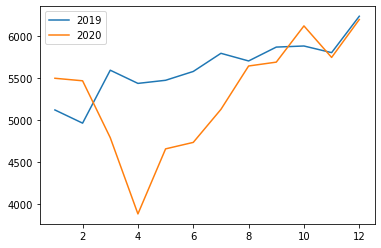

In [20]:
ano2019 = df2019['data_inversa'].dt.month.value_counts(sort=False)
ano2020 = df2020['data_inversa'].dt.month.value_counts(sort=False)
dados = {'2019':ano2019,
         '2020':ano2020}
acidentesdf = pd.DataFrame(dados)
acidentesdf.plot()

Sim, de fato a pandemia reduziu a incidência de acidência de acidentes nas rodovias federais, analisando o gráfico, pode-se notar que teve uma queda gigantesca durante os meses 3 e 4 de 2020, que foi quando estourou a pandemia no Brasil e paralisou o país inteiro, já nos meses seguintes as pessoas foram saindo de casa e os números naturalmente voltaram a crescer, e atingiram seu ápice no final de ano, em que é comum popularmente as festas de fim de ano.

Eu utilizei apenas os dados de 2019 e 2020 pois 2020 foi o ano que se iniciou a pandemia e usei apenas o ano anterior para ficar uma comparação com um menor intervalo de tempo, então eu contei a quantidade de casos que teve em cada mês utilizando parâmetros já citados e o (sort=False) para manter a ordem cronológica, logo depois eu juntei os dados e transformei em um dataframe, e no final o comando (<a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#basic-plotting-plot">plot</a>) para dar um ponto de vista melhor sobre a diferença entre os anos comparados.